In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn.cluster import DBSCAN
import numpy as np
from sklearn import metrics
from collections import Counter
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import seaborn as sns



In [2]:
def pre_process(df):

    df.drop( columns = ['id'], inplace = True)
    columns = df.columns
    
    df_arr = []
    for col in columns:
        if ( not (col in ["Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology"]) ):
            df_temp = pd.get_dummies(df[col])
            df_arr.append(df_temp)

    df_arr.append(df['Horizontal_Distance_To_Hydrology'])
    df_arr.append(df['Vertical_Distance_To_Hydrology'])
    concatenate = pd.concat(df_arr, axis=1, join='outer', ignore_index=False, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True)

    train_data = concatenate.to_numpy(dtype='int')
    pca = PCA(n_components=2)
    pca.fit(train_data)
    pca_transforrmed = pca.transform(train_data)

    return pca_transforrmed

In [3]:
# filename = 'clustering_data.csv'
# df = pd.read_csv(filename)


In [4]:
# train_data = pre_process(df)

In [5]:
# df

,Elevation,Aspect,Slope,Wilderness,Soil_Type,Hillshade_9am,Hillshade_noon,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points
0,elevation_medium,aspect_high,slope_low,comanche,bullwark_a,hillshade_9am_min,hillnoon_max,0,1,low
1,elevation_medium,aspect_medium,slope_medium,comanche,ratake_a,hillshade_9am_max,hillnoon_min,2,1,low
2,elevation_medium,aspect_high,slope_medium,comanche,ratake_a,hillshade_9am_min,hillnoon_max,1,1,low
3,elevation_medium,aspect_low,slope_ultra,comanche,bullwark_a,hillshade_9am_min,hillnoon_min,1,1,low
4,elevation_medium,aspect_high,slope_high,comanche,ratake_a,hillshade_9am_min,hillnoon_max,3,3,low
...,...,...,...,...,...,...,...,...,...,...
4115,elevation_medium,aspect_high,slope_ultra,comanche,ratake_a,hillshade_9am_min,hillnoon_max,4,0,mid
4116,elevation_medium,aspect_medium,slope_high,comanche,ratake_a,hillshade_9am_max,hillnoon_min,6,4,mid
4117,elevation_medium,aspect_high,slope_ultra,comanche,ratake_a,hillshade_9am_max,hillnoon_min,4,4,mid
4118,elevation_medium,aspect_high,slope_ultra,comanche,ratake_a,hillshade_9am_min,hillnoon_max,4,4,low


**Data Visulization**

In [6]:
def plot_graph(df):
    l = list (df.columns)[:-1]
    for column in l:
        sns_plot = sns.catplot(y=column, hue=column, kind="count",
                    palette="pastel", edgecolor=".6",
                    data=df)
        
        sns_plot.savefig("feature_vs" + column)

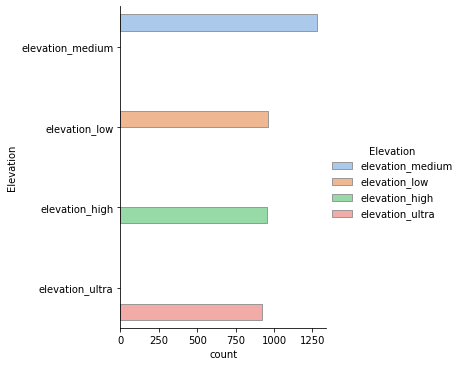

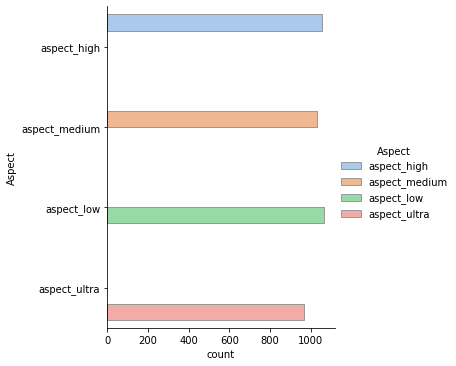

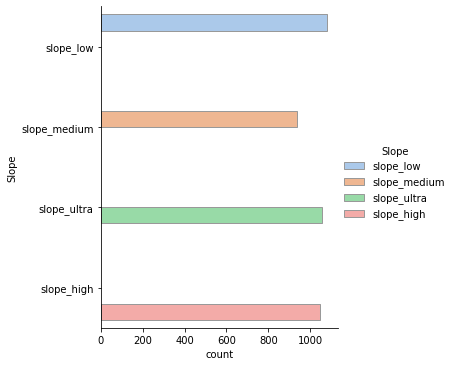

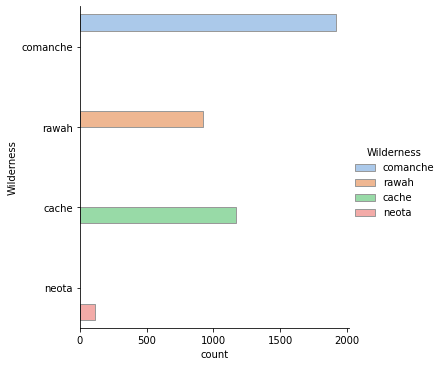

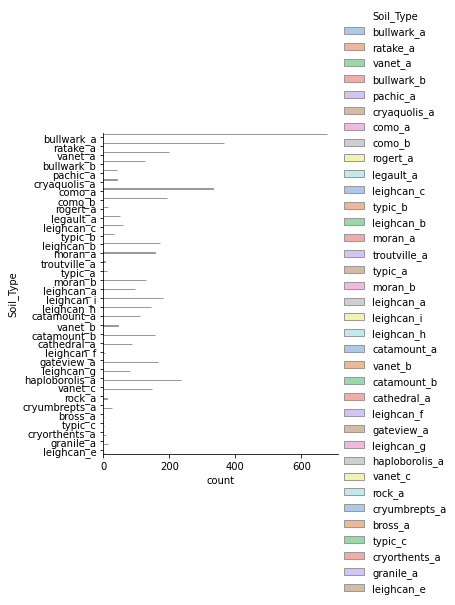

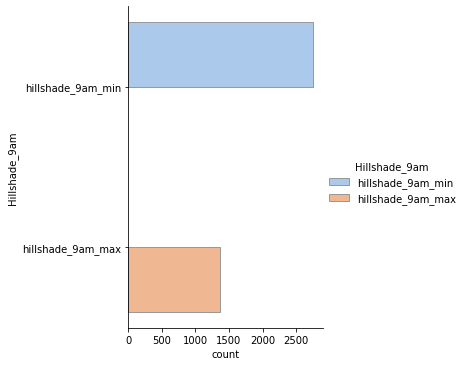

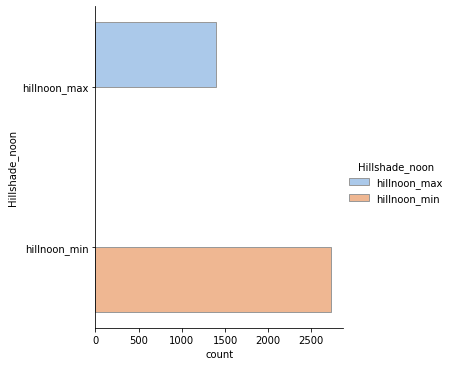

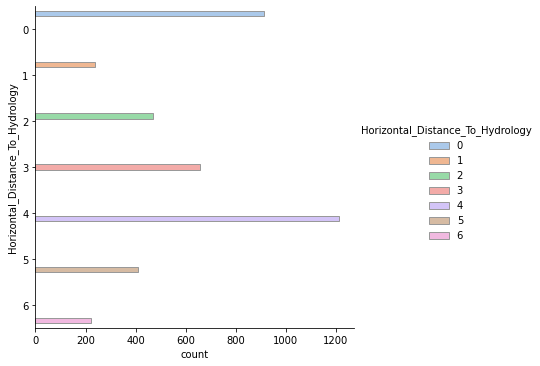

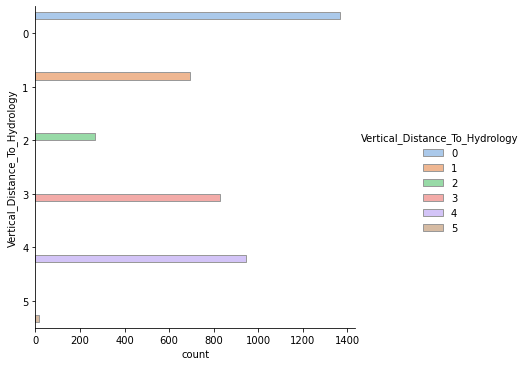

In [ ]:
# plot_graph(df)

**K-Means Clustering**

In [22]:
def get_kmeans_model(n, iter, train_data, filename):
    kmeans_model = KMeans(n_clusters=n, max_iter=iter,
                        init = 'random')
    kmeans_model.fit(train_data)
    y_kmeans = kmeans_model.predict(train_data)

    plt.scatter(train_data[:, 0], train_data[:, 1], c=y_kmeans, s=50, cmap='viridis')
    centers = kmeans_model.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

    plt.savefig(filename)
    return centers, Counter(y_kmeans), y_kmeans

In [8]:
# get_kmeans_model(7, train_data, 'K-Means.png')

In [9]:
# Counter(y_kmeans)

# print(centers)
base ={0:540, 1:542, 2:743, 3:540,4:540,5:675,6:540}
def difference(dic1, dic2, n):
    # for i in range(n):
    values1 = list(dic1.values())
    values2 = list(dic2.values())

    values1.sort()
    values2.sort()
    print(values1)
    print(values2)
    arr = []
    for key in range(n): 
        val1 = values1[key]
        val2 = values2[key]
        arr.append(abs(val1-val2))


    f = open('output3.txt', 'a')
    f.write(str(arr)+" "+str(sum(arr))+"\n")
    return arr



(array([[ 2.17014068, -1.14897401],
        [ 3.49312033,  0.37356047],
        [-3.18870427, -0.37910991],
        [ 0.3827124 , -0.92039981],
        [ 0.00507861,  1.60444085],
        [ 1.82005723,  0.37711542],
        [-1.58720454,  0.46693123]]),
 Counter({0: 629, 1: 385, 2: 976, 3: 495, 4: 605, 5: 541, 6: 489}))

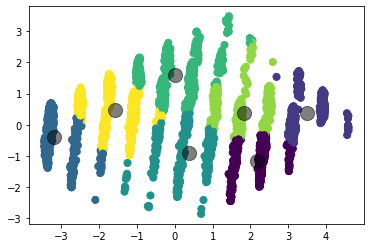

In [10]:
# print(Counter(y_kmeans))
# get_kmeans_model(7,300, train_data, 'K-Means.png')

**K-Means++ Clustering**

In [26]:
def k_mean_plus(n, iter, train_data, filename):

    kmeans_plus_model = KMeans(n_clusters=n, max_iter=iter,
                        init = 'k-means++')
    kmeans_plus_model.fit(train_data)
    y_kmeans_plus = kmeans_plus_model.predict(train_data)

    plt.scatter(train_data[:, 0], train_data[:, 1], c=y_kmeans_plus, s=50, cmap='viridis')
    centers_plus = kmeans_plus_model.cluster_centers_
    plt.scatter(centers_plus[:, 0], centers_plus[:, 1], c='black', s=200, alpha=0.5);

    plt.savefig(filename)
    return centers_plus, Counter(y_kmeans_plus), y_kmeans_plus


In [11]:
# k_mean_plus(7, train_data, 'K-Means++.png')

[540, 540, 540, 540, 542, 675, 743]
[317, 503, 514, 553, 577, 638, 1018]


[223, 37, 26, 13, 35, 37, 275]

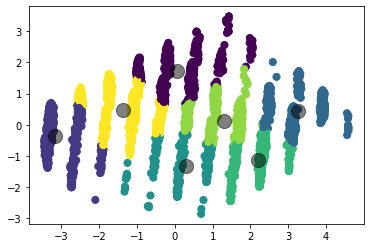

In [27]:
x,y, pred = k_mean_plus(7,10000, train_data, 'K-Means++.png')
difference(base,y,7)

**Algomorative Clustering**

In [13]:
def plot_dendrogram(model):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    dendrogram(linkage_matrix)

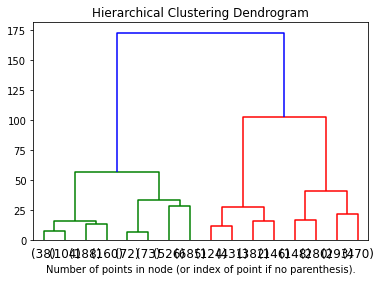

In [ ]:

# aglo_clustering = AgglomerativeClustering(n_clusters=None, distance_threshold = 0)
# aglo_clustering = aglo_clustering.fit(train_data)
# plt.title('Hierarchical Clustering Dendrogram')
# plot_dendrogram(aglo_clustering, truncate_mode='level', p=3)
# plt.xlabel("Number of points in node (or index of point if no parenthesis).")
# plt.show()


In [ ]:
def aglomerative(n):

    aglo_clustering = AgglomerativeClustering(n_clusters=n)
    y_aglo = aglo_clustering.fit_predict(train_data)

    return y_aglo, Counter(y_aglo)

In [ ]:
# x,y=aglomerative(7)
# difference(base,y,n)

[540, 540, 540, 540, 542, 675, 743]
[145, 428, 490, 526, 685, 763, 1083]


[395, 112, 50, 14, 143, 88, 340]

**DB Scan Clusterning**

In [19]:
def db_scan(eps, train_data, min_samples, filename):

    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(train_data)

    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
            for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]
        class_member_mask = (labels == k)

        xy = train_data[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                markeredgecolor='k', markersize=14)
        xy = train_data[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                markeredgecolor='k', markersize=6)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    # 
    plt.savefig(filename)
    plt.show()
    x = db.fit_predict(train_data)
    return x, Counter(x)

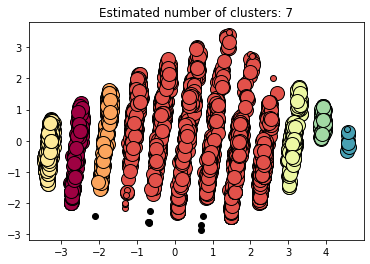

array([0, 1, 2, ..., 1, 1, 1])

<Figure size 432x288 with 0 Axes>

In [ ]:
# db_scan(0.51, train_data, 10, 'DB Scan.png')

In [ ]:
# train_data

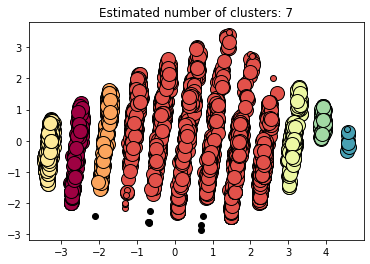

(array([0, 1, 2, ..., 1, 1, 1]),
 Counter({-1: 8, 0: 220, 1: 2441, 2: 222, 3: 813, 4: 256, 5: 146, 6: 14}))

In [ ]:
# db_scan(0.51, train_data, 10, 'DB Scan_0.51.png')

In [14]:
# df.head()

In [33]:
def runner():

    df = pd.read_csv('test_X.csv')
    ids = df['id']
    train_data = pre_process(df)
    
    print("Running K-Means")
    centers, count, pred = get_kmeans_model(7, 300, train_data, 'test_X_Kmeans.png')
    print("Centeres for K-Means", centers)

    test_dict = {
        'id' : ids,
        'Label': pred
    }
    test_df = pd.DataFrame(test_dict)
    test_df.to_csv('result_kmeans.csv', index = False)

    print("Running K-Means++")
    centers, count, pred = k_mean_plus(7, 10000, train_data, 'test_X_Kmeans++.png')
    print("Centers for K-Means ++", centers)

    test_dict = {
        'id' : ids,
        'Label': pred
    }
    test_df = pd.DataFrame(test_dict)
    test_df.to_csv('result_kmeans++.csv', index = False)

    print("Running DB Scan")
    pred, count = db_scan(0.51, train_data, 10, 'test_DB_Scan.png')
    
    test_dict = {
        'id' : ids,
        'Label': pred
    }
    test_df = pd.DataFrame(test_dict)
    test_df.to_csv('result_dbscan.csv', index = False)

Running K-Means
Centeres for K-Means [[ 0.5155569  -1.51288678]
 [ 2.25710296 -1.00583865]
 [-1.29308395  0.43280641]
 [ 0.06431252  1.73644503]
 [-3.14875823 -0.33709696]
 [ 1.28242047  0.13746266]
 [ 3.27891607  0.46289845]]
Running K-Means++
Centers for K-Means ++ [[-3.14935845 -0.33820503]
 [ 0.5155569  -1.51288678]
 [ 1.28130575  0.14369746]
 [ 0.06095797  1.7362064 ]
 [ 2.25531131 -0.99690627]
 [-1.29541762  0.43350928]
 [ 3.28621611  0.46678493]]
Running DB Scan


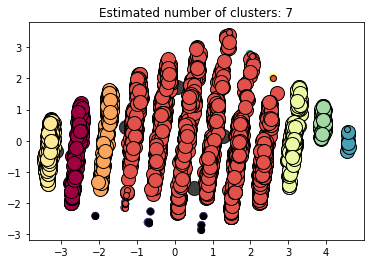

In [34]:
runner()